# Introduction

Important Info:

Hi and welcome to the Sportlogiq DA Questionnaire! The goal with this questionnaire is to assess your problem solving, hockey knowledge, and coding/stats abilities and your (hopeful) fit with some of our day-to-day tasks. If you find yourself stuck or unsure on a question, showing your work and explaining your problem solving/decision making is still highly recommended.

Libraries:
- You'll want to import libraries such as numpy, pandas, a plotting library like plotly/matplotlib, and a stats library of your choosing (sklearn for example)

Data Info:
- There are two data files. One has a condensed event set from a randomly chosen hockey game and the other contains Expected Goals values (xg) provided only for shots that successfully hit the net. If an xg value doesn't correspond to a shot event, it should not be counted

- X and Y Coordinates are in Feet and are adjusted such that both teams shoot in the same direction

- Line Carry events are tagged when the puck is carried over either blue line or the centre ice red line

- Binary columns that have values of 0 or 1 indicate 0=No, 1=Yes

- Successfull passes are completed passes, successful shots are shots on net

Please show all work, keep written answers succinct and to the point and most of all, thanks for your time and good luck!

In [1]:
pip install pandas numpy plotly matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import sklearn as sl

## Q1) 
### a) Who won the game & what was the score?
### b) Who won the Expected Goals (xg) battle & what was each team's total xg?
### c) What do these two answers tell us about how the two teams played?

## A1)
### a) Team 596 won the game and the score was (Team 596 4 - 1 Team 724) 
### b) Team 596 won the xg battle and the total xg of Team 596 was 4.7 whereas total xg of Team 724 was 3.2
### c) From the above outcomes we can tell that Team 596 was the better team but I would also say that the score doesn't reflect the match(being one sided) because the Team 724's xg was quite high and close to that of team 596, its just that they waren't able to convert their chances.

In [3]:
data_hockey_game = pd.read_csv('Tutorial22_df.csv')
data_hockey_game_xg = pd.read_csv('Tutorial22_xG_df.csv')
data_hockey_game

,gameid,teamid,opposingteamid,compiledgametime,playerid,eventname,outcome,type,possessionid,zone,xcoord,ycoord,teamskatersonicecount,opposingteamskatersonicecount,goal,team_net_empty,opponent_net_empty,scoredifferential
0,70632,596,724,2859.13330,485421,pass,successful,south,442,nz,-2.720505,-24.610668,5,5,0,0,0,3
1,70632,596,724,1023.53330,485421,pass,successful,north,160,oz,31.990311,9.805882,5,4,0,0,0,2
2,70632,724,596,3112.66670,628757,linecarry,successful,none,470,nz,-24.894119,-28.917648,5,5,0,0,0,-3
3,70632,724,596,212.20000,673651,pass,successful,outlet,30,dz,-73.223618,37.966553,5,5,0,0,0,0
4,70632,596,724,1893.66660,847481,reception,successful,regular,285,dz,-49.090302,-37.467644,5,5,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1650,70632,596,724,1892.93330,485421,pass,successful,outlet,285,dz,-68.705002,-21.373528,5,5,0,0,0,3
1651,70632,724,596,2501.80000,698619,pass,failed,north,382,oz,29.926468,-20.870590,5,5,0,0,0,-3
1652,70632,724,596,2225.73340,698619,reception,successful,regular,339,oz,67.691269,-40.985283,5,5,0,0,0,-3
1653,70632,596,724,3035.30000,485421,pass,successful,outlet,462,dz,-38.424080,18.355881,5,5,0,0,0,3


In [4]:
data_hockey_game_xg

,teamid,compiledgametime,playerid,xg
0,724,33.3000,628757,0.134104
1,724,35.1000,838211,0.188982
2,724,60.3000,628757,0.092400
3,724,68.2000,288890,0.039566
4,724,74.8200,288890,0.066700
...,...,...,...,...
57,724,3480.2666,303683,0.021970
58,724,3526.3667,698619,0.062146
59,596,3553.5000,290779,0.999535
60,724,3591.7334,261698,0.058529


In [5]:
goals_score = data_hockey_game.groupby('teamid')['goal'].sum()
goals_score

teamid
596    4
724    1
Name: goal, dtype: int64

In [6]:
team_xg = data_hockey_game_xg.groupby('teamid')['xg'].sum()
team_xg

teamid
596    4.742615
724    3.221937
Name: xg, dtype: float64

## Q2)
### a) Which possessionid had the highest total successful passes? 
### b) How many successful passes were there and why do you think this specific possession had so many?

## A2) 
### a) The possesionid 417 had the most successful passes
### b) There were 8 successful passes by possesionid 8 and I think the reason this possesionid had the most passes was because they were more on the offensive zone and the opposition team was a player short which made it easier to pass.

In [7]:
passes = data_hockey_game[(data_hockey_game['eventname'] == 'pass') & (data_hockey_game['outcome'] == 'successful')]
most_successful_possession_id = passes['possessionid'].value_counts()
most_successful_possession_id

417    8
262    6
111    6
175    6
189    6
      ..
211    1
450    1
33     1
64     1
297    1
Name: possessionid, Length: 301, dtype: int64

In [8]:
passes[passes['possessionid']==417]

,gameid,teamid,opposingteamid,compiledgametime,playerid,eventname,outcome,type,possessionid,zone,xcoord,ycoord,teamskatersonicecount,opposingteamskatersonicecount,goal,team_net_empty,opponent_net_empty,scoredifferential
872,70632,724,596,2683.6000,890686,pass,successful,outlet,417,dz,-63.117645,31.938236,5,4,0,0,0,-3
925,70632,724,596,2688.7334,154967,pass,successful,south,417,oz,37.470589,-38.473526,5,4,0,0,0,-3
951,70632,724,596,2692.5000,154967,pass,successful,north,417,oz,79.214706,-37.970589,5,4,0,0,0,-3
965,70632,724,596,2694.6333,890686,pass,successful,south,417,oz,98.326469,-7.794117,5,4,0,0,0,-3
981,70632,724,596,2696.0000,154967,pass,successful,south,417,oz,82.232353,-36.964706,5,4,0,0,0,-3
987,70632,724,596,2690.3667,698619,pass,successful,north,417,oz,34.955879,-39.479408,5,4,0,0,0,-3
1022,70632,724,596,2698.2666,698619,pass,successful,eastwest,417,oz,30.429413,-31.432350,5,4,0,0,0,-3
1037,70632,724,596,2699.3000,303683,pass,successful,eastwest,417,oz,34.955879,7.797058,5,4,0,0,0,-3


## Q3)
### a) Using the event data provided along with x/y coordinate columns, can you identify the likely xCoord of each blueline?

## A3)
### a) With the data provided I would say that the likely xCoord of each blue line are close to -25,+25 ( I got -27,23)

In [9]:
neutral_zone_events = data_hockey_game[data_hockey_game['zone'] == 'nz']

# calculate the average x-coordinate value of the neutral zone events
avg_xcoord = neutral_zone_events['xcoord'].mean()

# print the likely xCoord of each blueline
print("The likely xCoord of each blueline is: ", avg_xcoord - 25.0, "and", avg_xcoord + 25.0)

The likely xCoord of each blueline is:  -27.259677323790314 and 22.740322676209686


I tried to get the values by finding the mean of the coordinates and found the coordinates to be approximately (-27, 23), which I know are a bit off as the a real rink would have (-25, 25), you can see in the graph below that the normal zone is approximately (-25,25)

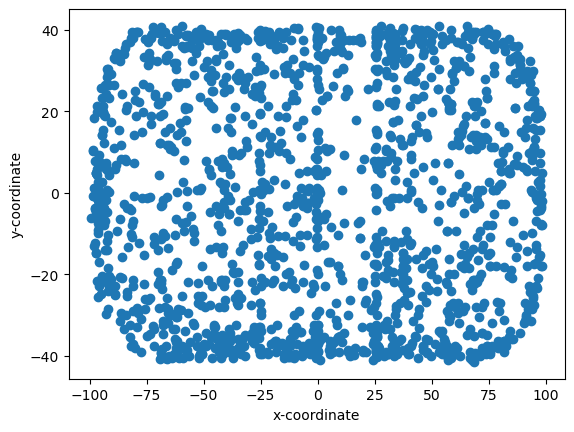

In [10]:

import matplotlib.pyplot as plt


# create scatter plot with x and y coordinates
plt.scatter(data_hockey_game['xcoord'], data_hockey_game['ycoord'])

# set axis labels
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')

# show the plot
plt.show()


In [11]:
pip install hockey_rink

## Q4)
### a) Create a subset of all shot attempts in the game and then with the plotting library of your choice, produce one scatter plot per team to illustrate where their shots were located and highlight any goals that were scored.
### b) Describe in 2-4 sentences your findings for each team.

## A4)
### a) The goals for Team 596 are highlighted in yellow and the goals for team 724 are highlighted in green
### b) From the graphs I found that the Team 724 which lost actually had more shots than the winning Team 596, Team 724 had 65 shots out of which they scored 1 and Team 596 had 47 shots which resulted in 4 goals

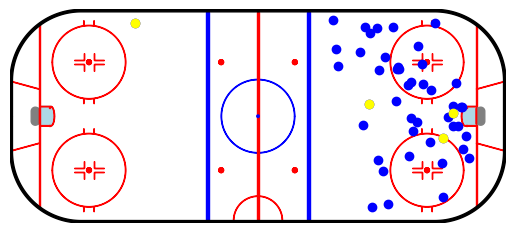

In [12]:
from hockey_rink import NHLRink
shots = data_hockey_game.loc[(data_hockey_game.eventname.isin(["shot"]))]
team_shots = shots[shots["teamid"] == 596]
rink = NHLRink(x_shift=1, y_shift=98.4/85, nzone={"length": 40})
ax = rink.draw()
goal_shots = team_shots[team_shots['goal']==1]
rink.scatter(team_shots["xcoord"], team_shots["ycoord"], color = 'blue')
rink.scatter(goal_shots["xcoord"], goal_shots["ycoord"], color = 'yellow')

I found this website https://pypi.org/project/hockey-rink/ from which I took the code for the rink

In [13]:
data_hockey_game[data_hockey_game['goal']==1]

,gameid,teamid,opposingteamid,compiledgametime,playerid,eventname,outcome,type,possessionid,zone,xcoord,ycoord,teamskatersonicecount,opposingteamskatersonicecount,goal,team_net_empty,opponent_net_empty,scoredifferential
249,70632,724,596,3424.83330,698619,shot,successful,slot,529,oz,73.132271,17.066551,6,5,1,1,0,-3
954,70632,596,724,1808.00000,797810,shot,successful,outside,273,dz,-49.090302,38.979412,4,5,1,0,0,2
992,70632,596,724,793.26666,797810,shot,successful,slot,126,oz,80.266541,2.261765,5,5,1,0,0,1
1156,70632,596,724,675.66670,424862,shot,successful,slot,110,oz,76.243011,-7.797058,5,5,1,0,0,0
1323,70632,596,724,3553.50000,290779,shot,successful,outside,555,oz,46.072662,6.285294,4,6,1,0,1,2


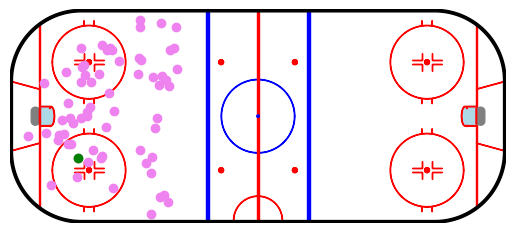

In [14]:
shotsB = data_hockey_game.loc[(data_hockey_game.eventname.isin(["shot"]))]
team_shotsB = shotsB[shotsB["teamid"] == 724]
rink = NHLRink(x_shift=1, y_shift=98.4/85, nzone={"length": 40})
ax = rink.draw()
goal_shotsB = team_shotsB[team_shotsB['goal']==1]
rink.scatter(1 - team_shotsB["xcoord"], 98.4/85 - team_shotsB["ycoord"], color = 'violet')
rink.scatter(1 - goal_shotsB["xcoord"], 98.4/85 - goal_shotsB["ycoord"], color = 'green')

In [15]:
len(shots[shots['teamid'] == 724 ])

65

In [16]:
len(shots[shots['teamid'] == 596 ])

47

## Q5)
### a) If the centre of the net that teams shoot at is located at xCoord=89, yCoord=0, create a column for the distance from each shot to this point. What is the distance of the furthest goal scored in the game?
### b) What is the expected goals (xg) value of this furthest goal and what do you think contributed to this xg value?

## A5)
### a) The distance for the furthest goal was approximately 143ft
### b) The xg for this goal was 0.004219(close to none) and it was this low because the goal was scored form the defensive zone and also the opponent team were a player up

In [17]:

data_hockey_game['shotDistance'] = np.sqrt((shots['xcoord'] - 89)**2 + shots['ycoord']**2)
data_hockey_game['shotDistance']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1650   NaN
1651   NaN
1652   NaN
1653   NaN
1654   NaN
Name: shotDistance, Length: 1655, dtype: float64

In [18]:
long_goal = data_hockey_game[(data_hockey_game['goal'] == 1)]
val = max(long_goal['shotDistance'])
xg_long_goal = data_hockey_game[data_hockey_game['shotDistance'] == val]
xg_long_goal


,gameid,teamid,opposingteamid,compiledgametime,playerid,eventname,outcome,type,possessionid,zone,xcoord,ycoord,teamskatersonicecount,opposingteamskatersonicecount,goal,team_net_empty,opponent_net_empty,scoredifferential,shotDistance
954,70632,596,724,1808.0,797810,shot,successful,outside,273,dz,-49.090302,38.979412,4,5,1,0,0,2,143.486327


In [19]:
compiledgametime_val = xg_long_goal['compiledgametime'].iloc[0]
playerid_val= xg_long_goal['playerid'].iloc[0]
data_hockey_game_xg.loc[(data_hockey_game_xg['compiledgametime'] == compiledgametime_val) & (data_hockey_game_xg['playerid'] == playerid_val), "xg"]

34    0.004219
Name: xg, dtype: float64

In [20]:
data_hockey_game_xg.loc[(data_hockey_game_xg['compiledgametime'] == compiledgametime_val) & (data_hockey_game_xg['playerid'] == playerid_val)]

,teamid,compiledgametime,playerid,xg
34,596,1808.0,797810,0.004219


## Q6)
### a) If a "Shot Assist" is defined as a sequence of events with the same possessionid where there is: 1) a successful pass followed by 2) a successful reception by a teammate and then without giving up the puck 3) the receiving player has a shot attempt, create a column flagging shots that have a Shot Assist. Which player(s) had the most assisted shots in the game and how many assisted shots did they have?

### Hint: This can be done using iterrows() or using shift() logic. Consider if you should include ALL event rows and beware of sorting!

## A6)
### a) Player 538217 and 677394 had the most assisted shots with 4 each 

In [21]:
df = data_hockey_game
df['shot_assist'] = 0

for i, row in df.iterrows():
    if row['eventname'] == 'shot':
        possession_id = row['possessionid']
        team_id = row['teamid']
        team_events = df[(df['possessionid'] == possession_id) & (df['teamid'] == team_id)]
        prev_event = team_events.shift(1).iloc[-1]
        prev2_event = team_events.shift(2).iloc[-1]
        if prev_event['eventname'] == 'reception' and prev2_event['eventname'] == 'pass' and prev2_event['outcome'] == 'successful':
            df.at[i, 'shot_assist'] = 1

df[df['shot_assist']==1][:5]


,gameid,teamid,opposingteamid,compiledgametime,playerid,eventname,outcome,type,possessionid,zone,xcoord,ycoord,teamskatersonicecount,opposingteamskatersonicecount,goal,team_net_empty,opponent_net_empty,scoredifferential,shotDistance,shot_assist
38,70632,724,596,2714.6000,303683,shot,failed,outsideblocked,419,oz,37.470589,-14.835293,5,4,0,0,0,-3,53.622441,1
50,70632,724,596,1403.6333,183489,shot,successful,slot,218,oz,69.710892,-0.252941,5,5,0,0,0,-2,19.290767,1
129,70632,596,724,2474.4000,92751,shot,failed,outsideblocked,376,oz,44.508820,37.467644,5,5,0,0,0,3,58.166051,1
139,70632,724,596,1406.9667,673651,shot,failed,outsideblocked,219,oz,41.043243,0.752941,5,5,0,0,0,-2,47.962667,1
155,70632,596,724,2079.9666,952287,shot,successful,slot,313,oz,62.059696,13.832354,5,5,0,0,0,3,30.283890,1


In [22]:
player_assists = df.groupby('playerid')['shot_assist'].sum()
player_assists = player_assists.sort_values(ascending=False)
top_assisters = player_assists[player_assists == player_assists.max()]

print('The player(s) with the most assisted shots in the game:')
for player_id, assists in top_assisters.iteritems():
    print(f'Player {player_id}: {assists} assisted shots')


The player(s) with the most assisted shots in the game:
Player 538217: 4 assisted shots
Player 677394: 4 assisted shots


## Q7)
### a) What is highest xg among the goals that were scored and why do you think it was this high? 
### b) Did this goal have a shot assist?

## A7)
### a) The highest xg among all the goals that were scored was 0.999, I think the xg was that high because the opposition net was empty and the team was in the offensive zone
### b)  No this goal did not have a shot assist

In [23]:
merged_df = pd.merge(data_hockey_game, data_hockey_game_xg, on=['compiledgametime', 'teamid', 'playerid'])
max(merged_df.loc[merged_df['goal'] == 1, 'xg'])

0.999534607

In [24]:
merged_df[merged_df['goal'] == 1]

,gameid,teamid,opposingteamid,compiledgametime,playerid,eventname,outcome,type,possessionid,zone,...,ycoord,teamskatersonicecount,opposingteamskatersonicecount,goal,team_net_empty,opponent_net_empty,scoredifferential,shotDistance,shot_assist,xg
9,70632,724,596,3424.83330,698619,shot,successful,slot,529,oz,...,17.066551,6,5,1,1,0,-3,23.303476,1,0.087426
30,70632,596,724,1808.00000,797810,shot,successful,outside,273,dz,...,38.979412,4,5,1,0,0,2,143.486327,0,0.004219
32,70632,596,724,793.26666,797810,shot,successful,slot,126,oz,...,2.261765,5,5,1,0,0,1,9.021579,1,0.484870
41,70632,596,724,675.66670,424862,shot,successful,slot,110,oz,...,-7.797058,5,5,1,0,0,0,14.951083,1,0.125413
46,70632,596,724,3553.50000,290779,shot,successful,outside,555,oz,...,6.285294,4,6,1,0,1,2,43.385035,0,0.999535


## Q8) 
### a) Consider other shots with high xg values, without engineering any additional features (aside from the columns you've already been asked to create in the questions above), use a statistical technique of your choice to show the highest predictors of a goal within this dataset.
### b) Please explain your reasoning for choosing this technique and explain your findings

### Hint: look back at the columns you were asked to create, along with the columns already provided in the event dataset, what would lead to dangerous shot attempts?

## A8)
### a) I used logistic regression to find the highest predictors, xg, shot_assist and opposition players on ice are high predictors of goal.
### b) I used Logistic regression as goal scored is either true or false and Logistic regression is really good at this type of classification analysis, and I found that xg is the highest predictor of goal, which means higher the xg the more the chance of goal, other good predictor of a goal is a shot_assist(an assisted shot has more chances of being a goal), opposition skater on ice as lesser the opponents on ice more the chance of goal, shot distance and score differential have a small goal prediction values, whereas the rest of the columns don't really have any significance in predicting a goal

In [25]:
import statsmodels.api as sm
df = merged_df
predictors = ['shotDistance', 'shot_assist','scoredifferential','opposingteamskatersonicecount', 'xg']
X = merged_df[predictors]
y = merged_df['goal']
model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.194450
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                   goal   No. Observations:                   57
Model:                          Logit   Df Residuals:                       52
Method:                           MLE   Df Model:                            4
Date:                Sat, 11 Mar 2023   Pseudo R-squ.:                  0.3458
Time:                        21:51:42   Log-Likelihood:                -11.084
converged:                       True   LL-Null:                       -16.942
Covariance Type:            nonrobust   LLR p-value:                   0.01959
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
shotDistance                      0.0537      0.023      2.310      0.

# Before you submit:

Please check that you have answered all questions (and sub-questions) to the best of your ability and that every answer can be clearly traced back to work that is shown. If you were unable to produce an answer, please describe and show the work you tried.

Thanks for your time, effort and interest!